# Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("Datasets/Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = data[['GRE Score', 'CGPA', 'Research']]
df = df.dropna()
df[['GRE Score', 'CGPA']] = scaler.fit_transform(df[['GRE Score', 'CGPA']])
df.head()


,GRE Score,CGPA,Research
0,1.762107,1.764818,1
1,0.627656,0.455151,1
2,-0.070467,-1.005631,1
3,0.453126,0.119339,1
4,-0.244998,-0.653029,0


# Logistic Regression

In [6]:
np.ones(5).shape

(5,)

In [98]:
X = df[['GRE Score', 'CGPA']].values
y = df[['Research']].values

X = np.c_[np.ones(X.shape[0]), X]
y = y.squeeze()
w = np.random.rand(3)
y.shape, X.shape, w.shape

((400,), (400, 3), (3,))

# Cross entropy loss

In [99]:
def calculate_z(X, w):
    z = np.dot(X, w)
    return z

def calculate_sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))  # Removed +1e-2
    return sigmoid

def calculate_loss_binary_entropy(y_true, y_pred):
    epsilon = 1e-10  # Small value to avoid log(0)
    cost = - y_true * np.log(y_pred + epsilon) - (1 - y_true) * np.log(1 - y_pred + epsilon)
    loss = np.mean(cost)
    return loss

def calculate_GD_binary_entropy(y, y_hat, X):
    derivative = np.dot(X.T, (y_hat - y)) / y.size
    return derivative

z = calculate_z(X, w)
sigmoid = calculate_sigmoid(z)
loss = calculate_loss_binary_entropy(y, sigmoid)
sigmoid
loss
dldw = calculate_GD_binary_entropy(y, sigmoid, X)
dldw


array([ 0.06327249, -0.07108441, -0.06058897])

## Train

In [139]:
X = df[['GRE Score', 'CGPA']].values
y = df[['Research']].values
X = np.c_[np.ones(X.shape[0]), X]
y = y.squeeze()

y.shape, X.shape

((400,), (400, 3))

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify= y_test)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((320, 3), (40, 3), (40, 3), (320,), (40,), (40,))

In [141]:
alpha = 0.003
epochs = 1000
batch_size  = 10
w = np.random.rand(3)

Epoch 1/1000, loss: 0.4369471796939706, f1: 0.7272727272727273, accuracy: 0.7
Best f1: 0.7272727272727273
Epoch 2/1000, loss: 0.4362550191411076, f1: 0.7272727272727273, accuracy: 0.7
Epoch 3/1000, loss: 0.43557844902466386, f1: 0.7272727272727273, accuracy: 0.7
Epoch 4/1000, loss: 0.4349170291235507, f1: 0.7272727272727273, accuracy: 0.7
Epoch 5/1000, loss: 0.4342703348870807, f1: 0.7272727272727273, accuracy: 0.7
Epoch 6/1000, loss: 0.43363795675235756, f1: 0.7272727272727273, accuracy: 0.7
Epoch 7/1000, loss: 0.43301949949666757, f1: 0.7272727272727273, accuracy: 0.7
Epoch 8/1000, loss: 0.43241458162282786, f1: 0.7272727272727273, accuracy: 0.7
Epoch 9/1000, loss: 0.4318228347755747, f1: 0.7272727272727273, accuracy: 0.7
Epoch 10/1000, loss: 0.43124390318720335, f1: 0.7272727272727273, accuracy: 0.7
Epoch 11/1000, loss: 0.4306774431507837, f1: 0.7272727272727273, accuracy: 0.7
Epoch 12/1000, loss: 0.4301231225193843, f1: 0.7272727272727273, accuracy: 0.7
Epoch 13/1000, loss: 0.42958

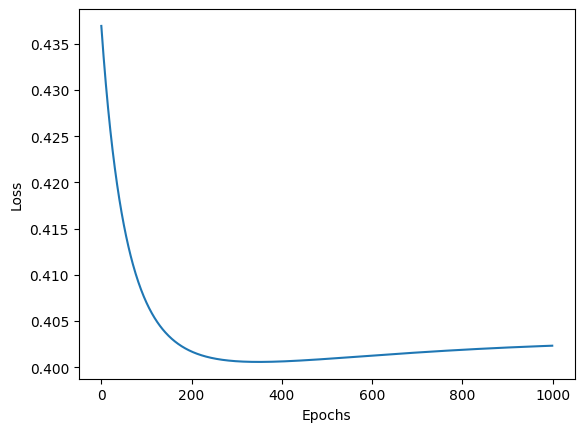

In [142]:
# Trainning (mini-batch)
from sklearn.metrics import f1_score, accuracy_score
def GD_mini_batch(X_train, y_train, X_val, y_val, w, alpha, epochs, batch_size):
    lossess = []
    best_w = w
    best_f1 = 0
    
    for epoch in range(epochs):
        # Training loop
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i : i + batch_size, :]
            y_batch = y_train[i : i + batch_size]

            #Calculate z
            z = calculate_z(X_batch, w)

            #Calculate y_hat
            y_prob_hat = calculate_sigmoid(z)

            #Calculate loss
            loss = calculate_loss_binary_entropy(y_batch, y_prob_hat)

            #Calculate gradient
            dldw = calculate_GD_binary_entropy(y_batch, y_prob_hat, X_batch)

            # Update w
            w = w - alpha * dldw
        
        lossess.append(loss)

        # Validation loop
        z_val = calculate_z(X_val, w)

        y_prob_val = calculate_sigmoid(z_val)

        y_label_predict = [1 if i > 0.5 else 0 for i in y_prob_val]

        f1 = f1_score(y_val, y_label_predict)
        accuracy = accuracy_score(y_val, y_label_predict)

        print(f'Epoch {epoch + 1}/{epochs}, loss: {loss}, f1: {f1}, accuracy: {accuracy}')
        
        if f1 > best_f1:
            best_f1 = f1
            best_w = w
            print(f"Best f1: {best_f1}")

    return best_w, lossess

best_w, lossess = GD_mini_batch(X_train, y_train, X_val, y_val, w, alpha, epochs, batch_size)

plt.plot(lossess)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


## Evaluate

In [143]:
z_test = calculate_z(X_test, best_w)
y_prob_test = calculate_sigmoid(z_test)
y_label_predict = [1 if i > 0.5 else 0 for i in y_prob_test]

f1 = f1_score(y_test, y_label_predict)
accuracy = accuracy_score(y_test, y_label_predict)
f1, accuracy

(0.8095238095238095, 0.8)

## Plot

In [144]:
z_values = calculate_z(X_train, best_w)
y_prob = calculate_sigmoid(z_values)

In [ ]:
# Extract x1 (GRE Score) and x2 (CGPA)
x1 = X_train[:, 1]  
x2 = X_train[:, 2]  
y_true = y_train  # True labels (0 or 1)

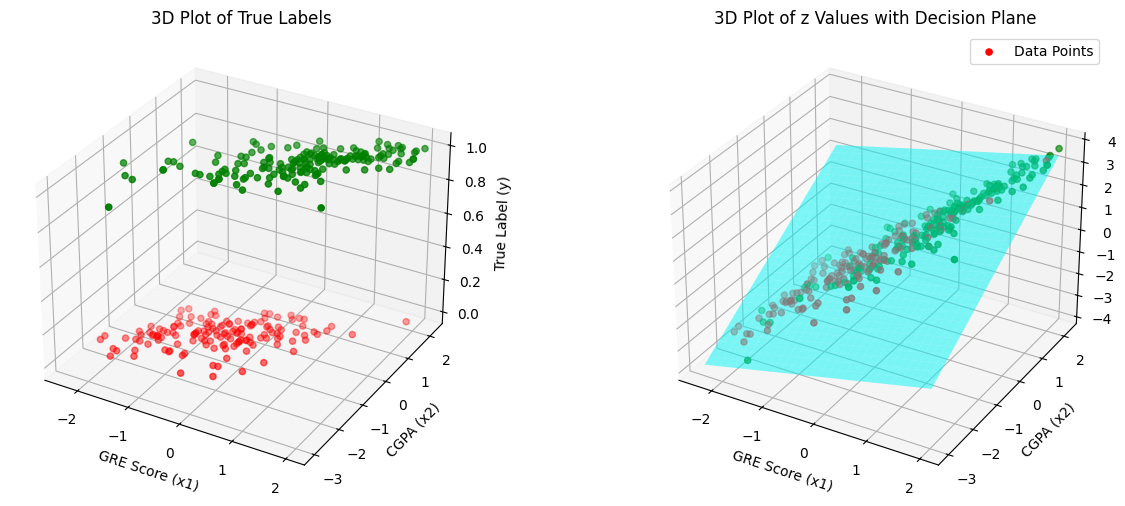

In [146]:
# Set colors based on y values
colors = ['green' if label == 1 else 'red' for label in y_train]

# Create a figure with two 3D subplots
fig = plt.figure(figsize=(15, 6))

### 🔹 Subplot 1: True Labels in 3D ###
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x1, x2, y_true, c=colors, marker='o', label="True Labels")

# Labels & Title
ax1.set_xlabel("GRE Score (x1)")
ax1.set_ylabel("CGPA (x2)")
ax1.set_zlabel("True Label (y)")
ax1.set_title("3D Plot of True Labels")

#--------------------------------------------------------------------------------------------#

### 🔹 Subplot 2: 3D Scatter + Decision Plane ###
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x1, x2, z_values, c=colors, marker='o', label="Data Points")

# Create a meshgrid for the decision plane
x1_range = np.linspace(min(x1), max(x1), 30)
x2_range = np.linspace(min(x2), max(x2), 30)
X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)

# Compute z-plane (decision boundary)
Z_plane = w[0] + w[1] * X1_mesh + w[2] * X2_mesh
ax2.plot_surface(X1_mesh, X2_mesh, Z_plane, color='cyan', alpha=0.5)

# Labels & Title
ax2.set_xlabel("GRE Score (x1)")
ax2.set_ylabel("CGPA (x2)")
ax2.set_zlabel("z = np.dot(X, w)")
ax2.set_title("3D Plot of z Values with Decision Plane")


# Show plot
plt.legend()
plt.show()

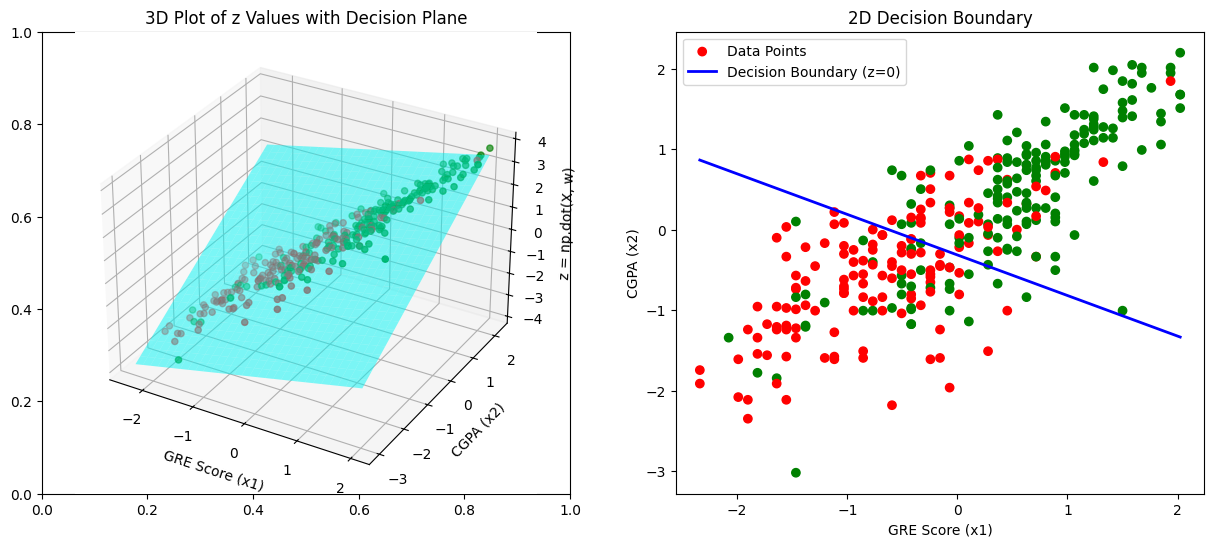

In [147]:
# Set colors based on y values
colors = ['green' if label == 1 else 'red' for label in y_train]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

### 🔹 Subplot 1: 3D Scatter + Decision Plane ###
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x1, x2, z_values, c=colors, marker='o', label="Data Points")

# Create a meshgrid for the decision plane
x1_range = np.linspace(min(x1), max(x1), 30)
x2_range = np.linspace(min(x2), max(x2), 30)
X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)

# Compute z-plane (decision boundary)
Z_plane = w[0] + w[1] * X1_mesh + w[2] * X2_mesh
ax1.plot_surface(X1_mesh, X2_mesh, Z_plane, color='cyan', alpha=0.5)

# Labels & Title
ax1.set_xlabel("GRE Score (x1)")
ax1.set_ylabel("CGPA (x2)")
ax1.set_zlabel("z = np.dot(X, w)")
ax1.set_title("3D Plot of z Values with Decision Plane")

### 🔹 Subplot 2: 2D Decision Boundary ###
ax2 = axes[1]
ax2.scatter(x1, x2, c=colors, marker='o', label="Data Points")

# Compute decision boundary where z = 0
x1_decision = np.linspace(min(x1), max(x1), 100)
x2_decision = (-w[0] - w[1] * x1_decision) / w[2]  # Solving w0 + w1*x1 + w2*x2 = 0

# Plot decision boundary
ax2.plot(x1_decision, x2_decision, 'blue', linewidth=2, label="Decision Boundary (z=0)")

# Labels & Title
ax2.set_xlabel("GRE Score (x1)")
ax2.set_ylabel("CGPA (x2)")
ax2.set_title("2D Decision Boundary")
ax2.legend()

# Show plot
plt.show()

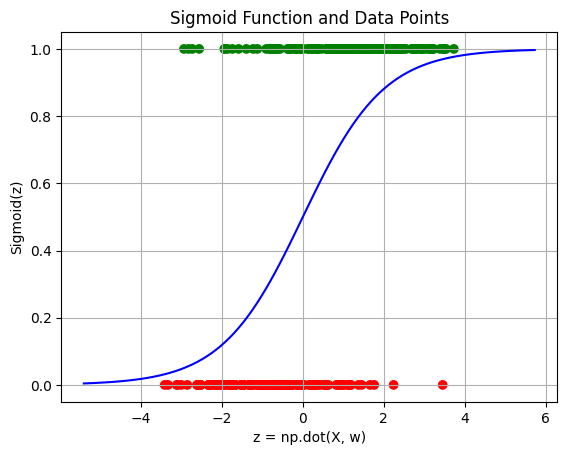

In [148]:

# Generate smooth curve for sigmoid function
z_range = np.linspace(min(z_values) - 2, max(z_values) + 2, 100)
sigmoid_curve = calculate_sigmoid(z_range)

# Plot the data points
colors = ['green' if label == 1 else 'red' for label in y_train]
plt.scatter(z_values, y_train, color=colors, label="Data Points")

# Plot the sigmoid curve
plt.plot(z_range, sigmoid_curve, color='blue', label="Sigmoid Function")

# Labels and title
plt.xlabel("z = np.dot(X, w)")
plt.ylabel("Sigmoid(z)")
plt.title("Sigmoid Function and Data Points")
plt.grid()

# Show plot
plt.show()


# MSE

In [110]:
X = df[['GRE Score', 'CGPA']].values
y = df[['Research']].values

X = np.c_[np.ones(X.shape[0]), X]
y = y.squeeze()
w = np.random.rand(3)
y.shape, X.shape, w.shape

((400,), (400, 3), (3,))

In [111]:
def calculate_z(X, w):
    z = np.dot(X, w)
    return z

def calculate_sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))  # Removed +1e-2
    return sigmoid

def calculate_loss_MSE(y_true, y_pred):
    cost = np.square(y_true - y_pred)
    loss = np.mean(cost)
    return loss

def calculate_GD_MSE(y, y_hat, X):
    derivative = (-2 * np.dot(X.T ,(y - y_hat) * y_hat * (1 - y_hat))) / y.size
    return derivative

z = calculate_z(X, w)
sigmoid = calculate_sigmoid(z)
loss = calculate_loss_MSE(y, sigmoid)
sigmoid
loss
dldw = calculate_GD_binary_entropy(y, sigmoid, X)
dldw

array([ 0.06605001, -0.11545772, -0.09623064])

## Train

In [128]:
X = df[['GRE Score', 'CGPA']].values
y = df[['Research']].values
X = np.c_[np.ones(X.shape[0]), X]
y = y.squeeze()

y.shape, X.shape

((400,), (400, 3))

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify= y_test)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((320, 3), (40, 3), (40, 3), (320,), (40,), (40,))

In [130]:
alpha = 0.003
epochs = 1000
batch_size  = 10
w = np.random.rand(3)

Epoch 1/1000, loss: 0.15047404067867426, f1: 0.8085106382978724, accuracy: 0.775
Best f1: 0.8085106382978724
Epoch 2/1000, loss: 0.15006870479631623, f1: 0.8085106382978724, accuracy: 0.775
Epoch 3/1000, loss: 0.1496686117739726, f1: 0.8085106382978724, accuracy: 0.775
Epoch 4/1000, loss: 0.14927367354263282, f1: 0.8085106382978724, accuracy: 0.775
Epoch 5/1000, loss: 0.14888380382634453, f1: 0.8085106382978724, accuracy: 0.775
Epoch 6/1000, loss: 0.1484989181008785, f1: 0.8085106382978724, accuracy: 0.775
Epoch 7/1000, loss: 0.14811893355339206, f1: 0.8085106382978724, accuracy: 0.775
Epoch 8/1000, loss: 0.1477437690430707, f1: 0.8085106382978724, accuracy: 0.775
Epoch 9/1000, loss: 0.147373345062725, f1: 0.8085106382978724, accuracy: 0.775
Epoch 10/1000, loss: 0.14700758370132186, f1: 0.8085106382978724, accuracy: 0.775
Epoch 11/1000, loss: 0.14664640860742836, f1: 0.8085106382978724, accuracy: 0.775
Epoch 12/1000, loss: 0.14628974495354763, f1: 0.8085106382978724, accuracy: 0.775
Ep

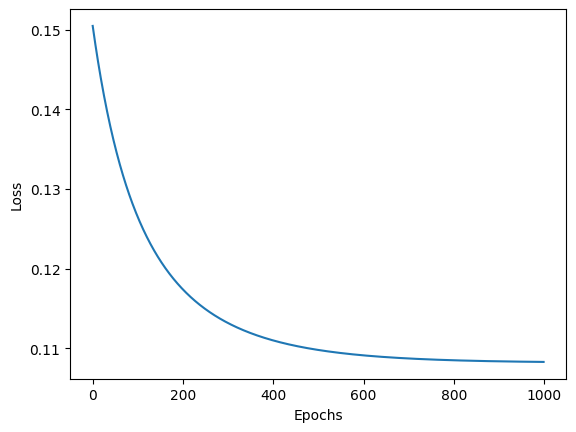

In [131]:
# Trainning (mini-batch)
from sklearn.metrics import f1_score, accuracy_score
def GD_mini_batch(X_train, y_train, X_val, y_val, w, alpha, epochs, batch_size):
    lossess = []
    best_w = w
    best_f1 = 0
    
    for epoch in range(epochs):
        # Training loop
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i : i + batch_size, :]
            y_batch = y_train[i : i + batch_size]

            #Calculate z
            z = calculate_z(X_batch, w)

            #Calculate y_hat
            y_prob_hat = calculate_sigmoid(z)

            #Calculate loss
            loss = calculate_loss_MSE(y_batch, y_prob_hat)

            #Calculate gradient
            dldw = calculate_GD_MSE(y_batch, y_prob_hat, X_batch)

            # Update w
            w = w - alpha * dldw
        
        lossess.append(loss)

        # Validation loop
        z_val = calculate_z(X_val, w)

        y_prob_val = calculate_sigmoid(z_val)

        y_label_predict = [1 if i > 0.5 else 0 for i in y_prob_val]

        f1 = f1_score(y_val, y_label_predict)
        accuracy = accuracy_score(y_val, y_label_predict)

        print(f'Epoch {epoch + 1}/{epochs}, loss: {loss}, f1: {f1}, accuracy: {accuracy}')
        
        if f1 > best_f1:
            best_f1 = f1
            best_w = w
            print(f"Best f1: {best_f1}")

    return best_w, lossess

best_w, lossess = GD_mini_batch(X_train, y_train, X_val, y_val, w, alpha, epochs, batch_size)

plt.plot(lossess)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


## Evaluate

In [132]:
z_test = calculate_z(X_test, best_w)
y_prob_test = calculate_sigmoid(z_test)
y_label_predict = [1 if i > 0.5 else 0 for i in y_prob_test]
f1 = f1_score(y_test, y_label_predict)
accuracy = accuracy_score(y_test, y_label_predict)
f1, accuracy

(0.7755102040816326, 0.725)

## PLot

In [133]:
z_values = calculate_z(X_train, best_w)
y_prob = calculate_sigmoid(z_values)

In [134]:
# Extract x1 (GRE Score) and x2 (CGPA)
x1 = X_train[:, 1]  
x2 = X_train[:, 2]  
y_true = y_train  # True labels (0 or 1)

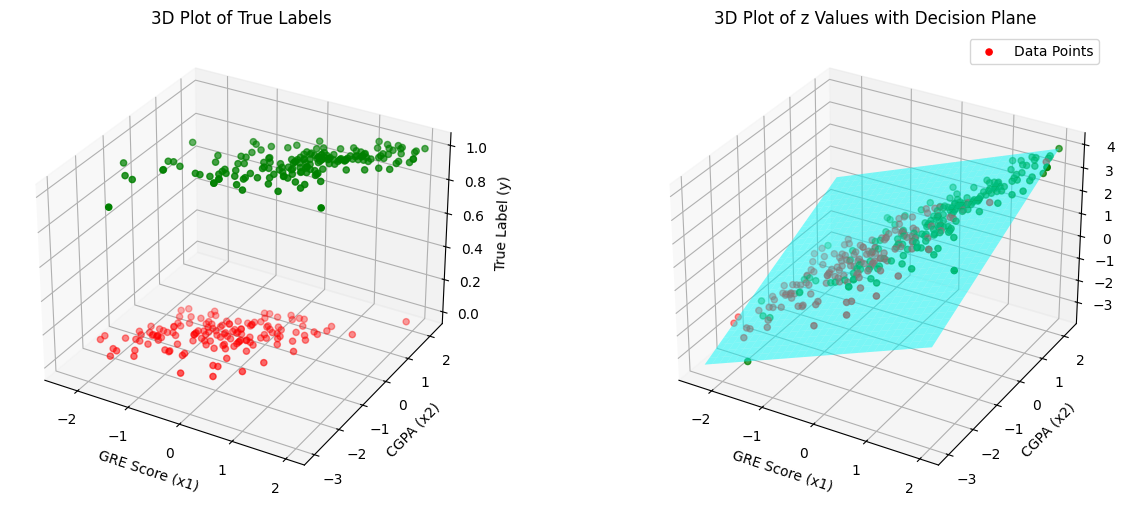

In [135]:
# Set colors based on y values
colors = ['green' if label == 1 else 'red' for label in y_train]

# Create a figure with two 3D subplots
fig = plt.figure(figsize=(15, 6))

### 🔹 Subplot 1: True Labels in 3D ###
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x1, x2, y_true, c=colors, marker='o', label="True Labels")

# Labels & Title
ax1.set_xlabel("GRE Score (x1)")
ax1.set_ylabel("CGPA (x2)")
ax1.set_zlabel("True Label (y)")
ax1.set_title("3D Plot of True Labels")

#--------------------------------------------------------------------------------------------#

### 🔹 Subplot 2: 3D Scatter + Decision Plane ###
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x1, x2, z_values, c=colors, marker='o', label="Data Points")

# Create a meshgrid for the decision plane
x1_range = np.linspace(min(x1), max(x1), 30)
x2_range = np.linspace(min(x2), max(x2), 30)
X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)

# Compute z-plane (decision boundary)
Z_plane = w[0] + w[1] * X1_mesh + w[2] * X2_mesh
ax2.plot_surface(X1_mesh, X2_mesh, Z_plane, color='cyan', alpha=0.5)

# Labels & Title
ax2.set_xlabel("GRE Score (x1)")
ax2.set_ylabel("CGPA (x2)")
ax2.set_zlabel("z = np.dot(X, w)")
ax2.set_title("3D Plot of z Values with Decision Plane")


# Show plot
plt.legend()
plt.show()

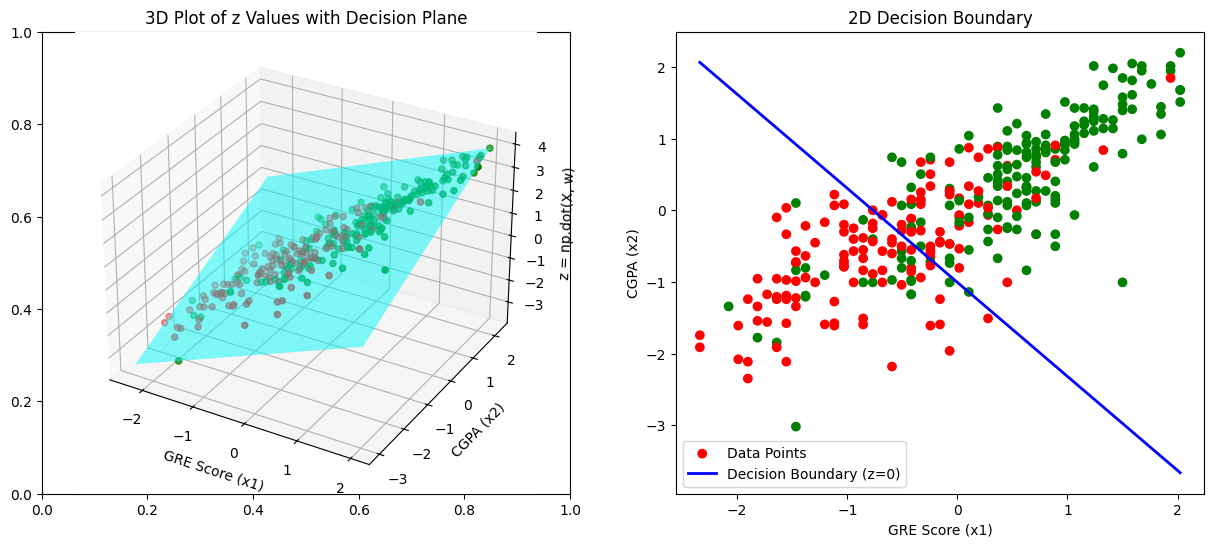

In [136]:
# Set colors based on y values
colors = ['green' if label == 1 else 'red' for label in y_train]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

### 🔹 Subplot 1: 3D Scatter + Decision Plane ###
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x1, x2, z_values, c=colors, marker='o', label="Data Points")

# Create a meshgrid for the decision plane
x1_range = np.linspace(min(x1), max(x1), 30)
x2_range = np.linspace(min(x2), max(x2), 30)
X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)

# Compute z-plane (decision boundary)
Z_plane = w[0] + w[1] * X1_mesh + w[2] * X2_mesh
ax1.plot_surface(X1_mesh, X2_mesh, Z_plane, color='cyan', alpha=0.5)

# Labels & Title
ax1.set_xlabel("GRE Score (x1)")
ax1.set_ylabel("CGPA (x2)")
ax1.set_zlabel("z = np.dot(X, w)")
ax1.set_title("3D Plot of z Values with Decision Plane")

### 🔹 Subplot 2: 2D Decision Boundary ###
ax2 = axes[1]
ax2.scatter(x1, x2, c=colors, marker='o', label="Data Points")

# Compute decision boundary where z = 0
x1_decision = np.linspace(min(x1), max(x1), 100)
x2_decision = (-w[0] - w[1] * x1_decision) / w[2]  # Solving w0 + w1*x1 + w2*x2 = 0

# Plot decision boundary
ax2.plot(x1_decision, x2_decision, 'blue', linewidth=2, label="Decision Boundary (z=0)")

# Labels & Title
ax2.set_xlabel("GRE Score (x1)")
ax2.set_ylabel("CGPA (x2)")
ax2.set_title("2D Decision Boundary")
ax2.legend()

# Show plot
plt.show()

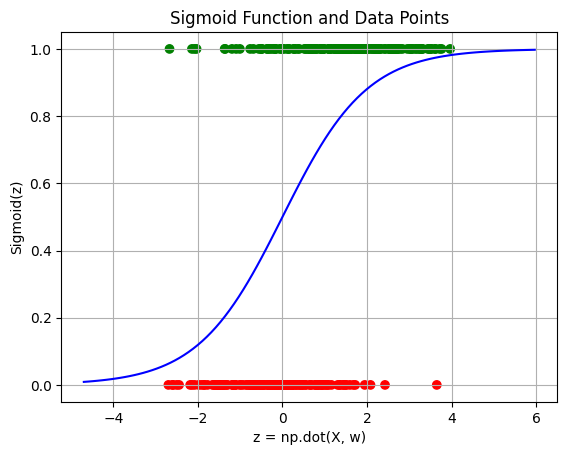

In [137]:

# Generate smooth curve for sigmoid function
z_range = np.linspace(min(z_values) - 2, max(z_values) + 2, 100)
sigmoid_curve = calculate_sigmoid(z_range)

# Plot the data points
colors = ['green' if label == 1 else 'red' for label in y_train]
plt.scatter(z_values, y_train, color=colors, label="Data Points")

# Plot the sigmoid curve
plt.plot(z_range, sigmoid_curve, color='blue', label="Sigmoid Function")

# Labels and title
plt.xlabel("z = np.dot(X, w)")
plt.ylabel("Sigmoid(z)")
plt.title("Sigmoid Function and Data Points")
plt.grid()

# Show plot
plt.show()


# Polynomial-Logistic Regression

In [138]:
def simple_feature_transform(row: np.array, degree: int = 1) -> np.array:
    row_transformed = np.array([1, *row])
    
    if degree == 1:
        return row_transformed
    else:
        for i in range(2, degree+1):
            row_transformed = np.append(row_transformed, row**i)
        return row_transformed

X = np.vstack(df[['GRE Score', 'CGPA']].apply(lambda row: simple_feature_transform(row.values, 2), axis=1))
y = df[['Research']].values.squeeze()
w = np.random.rand(5)

X.shape, y.shape, w.shape

((400, 5), (400,), (5,))

In [123]:
def calculate_z(X, w):
    z = np.dot(X, w)
    return z

def calculate_sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))  # Removed +1e-2
    return sigmoid

def calculate_loss_binary_entropy(y_true, y_pred):
    epsilon = 1e-10  # Small value to avoid log(0)
    cost = - y_true * np.log(y_pred + epsilon) - (1 - y_true) * np.log(1 - y_pred + epsilon)
    loss = np.mean(cost)
    return loss

def calculate_GD_binary_entropy(y, y_hat, X):
    derivative = np.dot(X.T, (y_hat - y)) / y.size
    return derivative

z = calculate_z(X, w)
sigmoid = calculate_sigmoid(z)
loss = calculate_loss_binary_entropy(y, sigmoid)
dldw = calculate_GD_binary_entropy(y, sigmoid, X)
sigmoid, loss, dldw


(array([0.99533203, 0.81407563, 0.75413307, 0.75898848, 0.68555853,
        0.95506338, 0.77492097, 0.77290227, 0.80859454, 0.77814077,
        0.82695461, 0.88354571, 0.90962644, 0.74971113, 0.67938949,
        0.66834193, 0.67543538, 0.78789462, 0.69771045, 0.7125632 ,
        0.76388674, 0.82695461, 0.95405466, 0.99149664, 0.99608925,
        0.99768072, 0.7674122 , 0.95193176, 0.98783701, 0.93784059,
        0.81901194, 0.87306581, 0.99352316, 0.99768072, 0.98793053,
        0.80384589, 0.79626487, 0.88155782, 0.91365272, 0.8418106 ,
        0.74248145, 0.70394147, 0.64042386, 0.95582523, 0.92359368,
        0.81261239, 0.94244929, 0.99764047, 0.75373158, 0.86590946,
        0.66321652, 0.76388674, 0.97458817, 0.84491784, 0.83140032,
        0.8777405 , 0.92424221, 0.93803496, 0.99520915, 0.65975289,
        0.7090493 , 0.69897716, 0.7346083 , 0.65327643, 0.82188161,
        0.83894973, 0.88571998, 0.66099831, 0.78309968, 0.91617676,
        0.98446814, 0.99558512, 0.87799924, 0.69

## Train

In [243]:
alpha = 0.003
epochs = 5000
batch_size  = 10
D = 3

In [244]:
X = np.vstack(df[['GRE Score', 'CGPA']].apply(lambda row: simple_feature_transform(row.values, D), axis=1))
y = df[['Research']].values.squeeze()
w = np.random.rand(X.shape[1])
w.shape

(7,)

In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify= y_test)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((320, 7), (40, 7), (40, 7), (320,), (40,), (40,))

Epoch 1/5000, loss: 0.4272289213363202, f1: 0.7441860465116279, accuracy: 0.725
Best f1: 0.7441860465116279
Epoch 2/5000, loss: 0.4313320432052481, f1: 0.7441860465116279, accuracy: 0.725
Epoch 3/5000, loss: 0.4354250612261278, f1: 0.7727272727272727, accuracy: 0.75
Best f1: 0.7727272727272727
Epoch 4/5000, loss: 0.43949714771239456, f1: 0.7727272727272727, accuracy: 0.75
Epoch 5/5000, loss: 0.4435373440638816, f1: 0.7727272727272727, accuracy: 0.75
Epoch 6/5000, loss: 0.4475346887269486, f1: 0.7727272727272727, accuracy: 0.75
Epoch 7/5000, loss: 0.45147834765914185, f1: 0.7727272727272727, accuracy: 0.75
Epoch 8/5000, loss: 0.45535774345933905, f1: 0.7727272727272727, accuracy: 0.75
Epoch 9/5000, loss: 0.4591626792203128, f1: 0.7555555555555555, accuracy: 0.725
Epoch 10/5000, loss: 0.4628834532808083, f1: 0.8085106382978724, accuracy: 0.775
Best f1: 0.8085106382978724
Epoch 11/5000, loss: 0.4665109614125714, f1: 0.8085106382978724, accuracy: 0.775
Epoch 12/5000, loss: 0.47003678356469

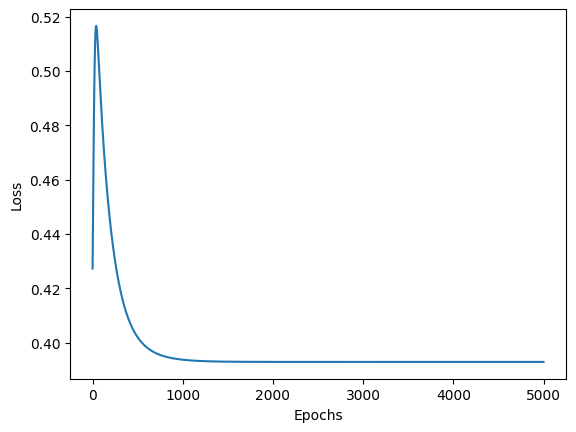

In [246]:
# Trainning (mini-batch)
from sklearn.metrics import f1_score, accuracy_score
def GD_mini_batch(X_train, y_train, X_val, y_val, w, alpha, epochs, batch_size):
    lossess = []
    best_w = w
    best_f1 = 0
    
    for epoch in range(epochs):
        # Training loop
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i : i + batch_size, :]
            y_batch = y_train[i : i + batch_size]

            #Calculate z
            z = calculate_z(X_batch, w)

            #Calculate y_hat
            y_prob_hat = calculate_sigmoid(z)

            #Calculate loss
            loss = calculate_loss_binary_entropy(y_batch, y_prob_hat)

            #Calculate gradient
            dldw = calculate_GD_binary_entropy(y_batch, y_prob_hat, X_batch)

            # Update w
            w = w - alpha * dldw
        
        lossess.append(loss)

        # Validation loop
        z_val = calculate_z(X_val, w)

        y_prob_val = calculate_sigmoid(z_val)

        y_label_predict = [1 if i > 0.5 else 0 for i in y_prob_val]

        f1 = f1_score(y_val, y_label_predict)
        accuracy = accuracy_score(y_val, y_label_predict)

        print(f'Epoch {epoch + 1}/{epochs}, loss: {loss}, f1: {f1}, accuracy: {accuracy}')
        
        if f1 > best_f1:
            best_f1 = f1
            best_w = w
            print(f"Best f1: {best_f1}")

    return best_w, lossess

best_w, lossess = GD_mini_batch(X_train, y_train, X_val, y_val, w, alpha, epochs, batch_size)

plt.plot(lossess)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


## Evaluate

In [247]:
z_test = calculate_z(X_test, best_w)
y_prob_test = calculate_sigmoid(z_test)
y_label_predict = [1 if i > 0.5 else 0 for i in y_prob_test]
f1 = f1_score(y_test, y_label_predict)
accuracy = accuracy_score(y_test, y_label_predict)
f1, accuracy

(0.7391304347826088, 0.7)

## PLot

In [248]:
z_values = calculate_z(X_train, best_w)
y_prob = calculate_sigmoid(z_values)

In [249]:
# Extract x1 (GRE Score) and x2 (CGPA)
x1 = X_train[:, 1]  
x2 = X_train[:, 2]  
y_true = y_train  # True labels (0 or 1)

In [250]:
def compute_decision_plane(X1, X2, w, D):
    """Compute the decision boundary dynamically for any degree D."""
    Z = np.zeros_like(X1) + w[0]  # Start with bias term w[0]
    
    index = 1  # Start from w[1]
    for d in range(1, D + 1):  # Loop through degrees 1 to D
        Z += w[index] * (X1**d)  # Add X1^d term
        index += 1
        Z += w[index] * (X2**d)  # Add X2^d term

    return Z

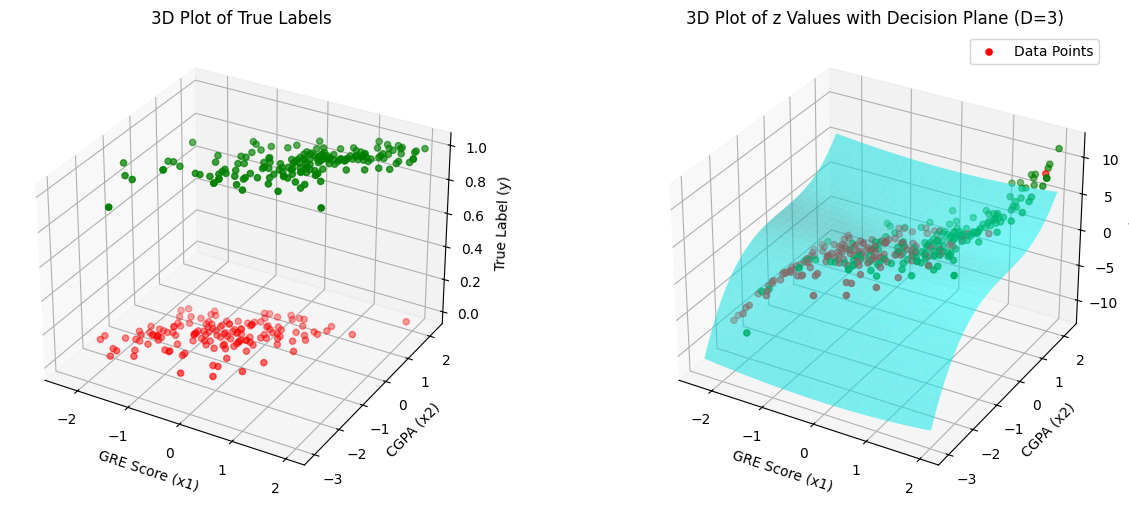

In [251]:
# Set colors based on y values
colors = ['green' if label == 1 else 'red' for label in y_train]

# Create a figure with two 3D subplots
fig = plt.figure(figsize=(15, 6))

### 🔹 Subplot 1: True Labels in 3D ###
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x1, x2, y_true, c=colors, marker='o', label="True Labels")

# Labels & Title
ax1.set_xlabel("GRE Score (x1)")
ax1.set_ylabel("CGPA (x2)")
ax1.set_zlabel("True Label (y)")
ax1.set_title("3D Plot of True Labels")

# -------------------------------------------------------------------------------------------- #

### 🔹 Subplot 2: 3D Scatter + Decision Plane ###
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x1, x2, z_values, c=colors, marker='o', label="Data Points")

# Create a meshgrid for the decision plane
x1_range = np.linspace(min(x1), max(x1), 30)
x2_range = np.linspace(min(x2), max(x2), 30)
X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)

# Compute z-plane (decision boundary) dynamically
Z_plane = compute_decision_plane(X1_mesh, X2_mesh, w, D)

ax2.plot_surface(X1_mesh, X2_mesh, Z_plane, color='cyan', alpha=0.5)

# Labels & Title
ax2.set_xlabel("GRE Score (x1)")
ax2.set_ylabel("CGPA (x2)")
ax2.set_zlabel("z = np.dot(X, w)")
ax2.set_title(f"3D Plot of z Values with Decision Plane (D={D})")

# Show plot
plt.legend()
plt.show()


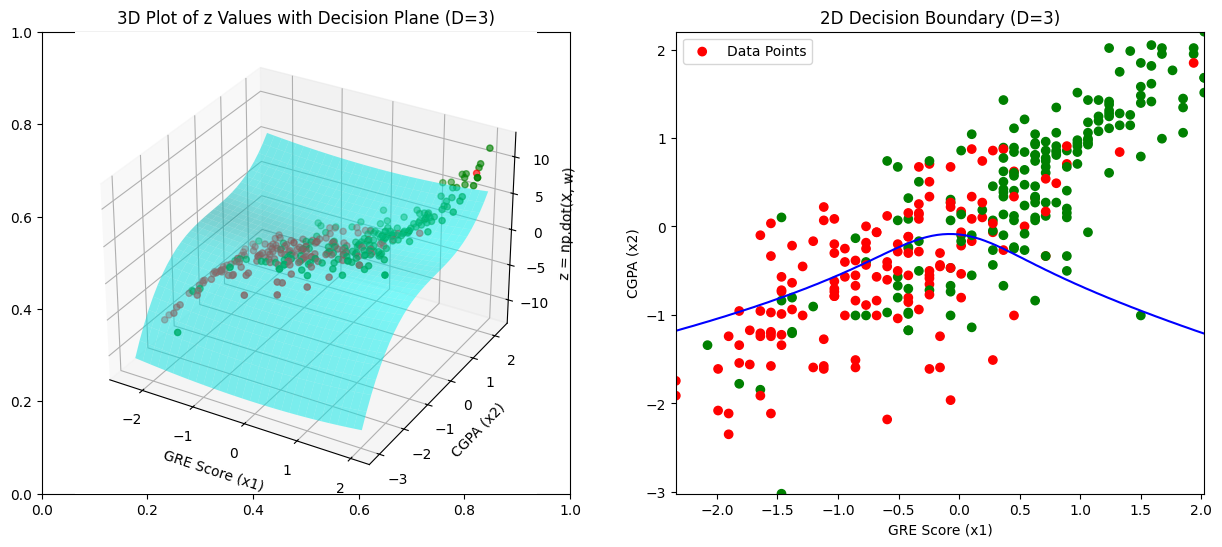

In [252]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

### 🔹 Subplot 1: 3D Scatter + Decision Plane ###
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x1, x2, z_values, c=colors, marker='o', label="Data Points")

# Create a meshgrid for the decision plane
x1_range = np.linspace(min(x1), max(x1), 30)
x2_range = np.linspace(min(x2), max(x2), 30)
X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)

# Compute z-plane (decision boundary) dynamically
Z_plane = compute_decision_plane(X1_mesh, X2_mesh, w, D)

ax1.plot_surface(X1_mesh, X2_mesh, Z_plane, color='cyan', alpha=0.5)

# Labels & Title
ax1.set_xlabel("GRE Score (x1)")
ax1.set_ylabel("CGPA (x2)")
ax1.set_zlabel("z = np.dot(X, w)")
ax1.set_title(f"3D Plot of z Values with Decision Plane (D={D})")

### 🔹 Subplot 2: 2D Decision Boundary ###
ax2 = axes[1]
ax2.scatter(x1, x2, c=colors, marker='o', label="Data Points")

# Compute decision boundary where z = 0
x1_decision = np.linspace(min(x1), max(x1), 100)
x2_decision = np.linspace(min(x2), max(x2), 100)
X1_decision, X2_decision = np.meshgrid(x1_decision, x2_decision)

# Compute the contour of the decision boundary dynamically
Z_decision = compute_decision_plane(X1_decision, X2_decision, w, D)

# Plot decision boundary as a contour line where Z_decision = 0
contour = ax2.contour(X1_decision, X2_decision, Z_decision, levels=[0], colors='blue')

# Labels & Title
ax2.set_xlabel("GRE Score (x1)")
ax2.set_ylabel("CGPA (x2)")
ax2.set_title(f"2D Decision Boundary (D={D})")
ax2.legend()

# Show plot
plt.show()

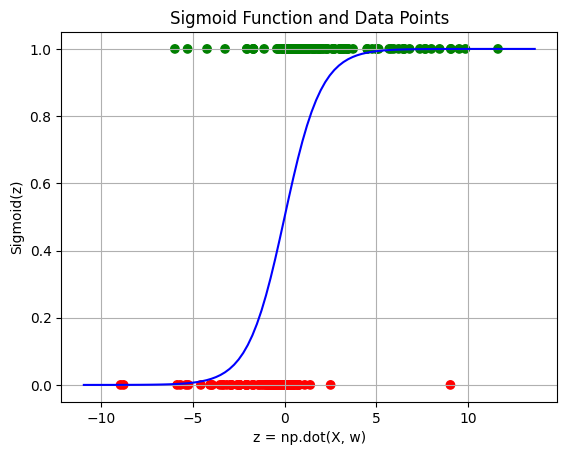

In [253]:
# Generate smooth curve for sigmoid function
z_range = np.linspace(min(z_values) - 2, max(z_values) + 2, 100)
sigmoid_curve = calculate_sigmoid(z_range)

# Plot the data points
colors = ['green' if label == 1 else 'red' for label in y_train]
plt.scatter(z_values, y_train, color=colors, label="Data Points")

# Plot the sigmoid curve
plt.plot(z_range, sigmoid_curve, color='blue', label="Sigmoid Function")

# Labels and title
plt.xlabel("z = np.dot(X, w)")
plt.ylabel("Sigmoid(z)")
plt.title("Sigmoid Function and Data Points")
plt.grid()

# Show plot
plt.show()
